<a href="https://colab.research.google.com/github/SoumapriyoM/Titanic-survival-prediction-/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, I will go through my solution and analysis of the Kaggle [Titanic survival prediction competition](https://www.kaggle.com/competitions/titanic).

##1. Load Datasets

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import missingno
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

<ipython-input-1585-028ee254ab42>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train_v=train.copy()

In [ ]:
test_v=pd.read_csv('test.csv')

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
train.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [ ]:
test.isnull().sum().sort_values(ascending = False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

In [ ]:
train_v['Sex'] = le.fit_transform(train['Sex'])
train_v.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.25,NaN,S


<ipython-input-1592-66f16c656a6b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train_v.corr()


<Axes: >

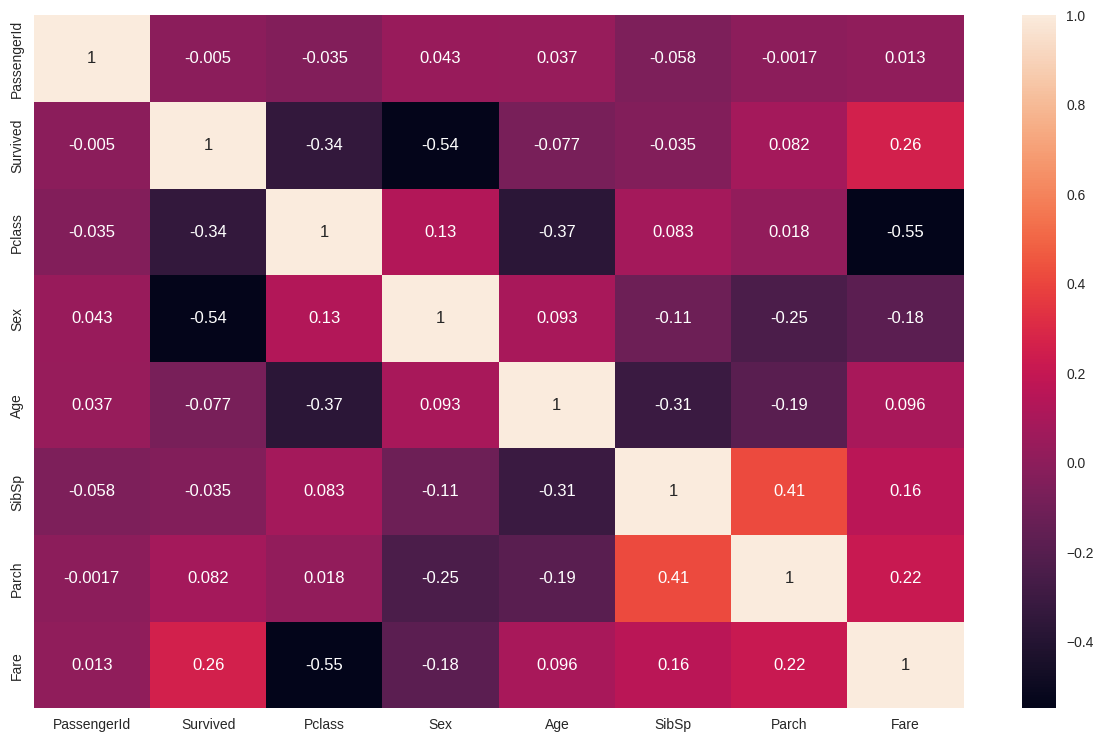

In [ ]:
corr = train_v.corr()
plt.figure(figsize=(15, 9))
sns.heatmap(corr, annot=True)

## 2. Features Description

- **Numerical** - Age,Fare,PassengerId
- **Categorical** - Survived, Pclass, Sex, SibSp, Parch,Embarked
- **Mixed** - Name, Ticket, Cabin

| Column Name                       | Description                                                                                        |
| ----------------------------------|:--------------------------------------------------------------------------------------------------:|
| PassengerId                       | Passenger Identity                                                                                                   |
| Survived                          | Whether passenger survived or not                                                                  |
| Pclass                            | Class of ticket                                                                                    |
| Name                              | Name of passenger                                                                                  |
| Sex                               | Sex of passenger                                                                                   |
| Age                               | Age of passenger                                                                                   |
| SibSp                             | Number of sibling and/or spouse travelling with passenger                                          |
| Parch                             | Number of parent and/or children travelling with passenger                                         |
| Ticket                            | Ticket number                                                                                      |
| Fare                              | Price of ticket                                                                                    |
| Cabin                             | Cabin number       

```
```



The data has been split into two groups:
<br>
- training set (train.csv)
<br>
- test set(test.csv)
<br>

The training set includes passengers survival status(also know as the ground truth from the titanic tragedy) which along with other features like gender, class, fare and pclass is used to create machine learning model.
<br><br>
The test set should be used to see how well my model performs on unseen data. The test set does not provide passengers survival status. We are going to use our model to predict passenger survival status.
<br><br>

Lets describe whats the meaning of the features given the both train & test datasets.
<h4>Variable Definition Key.</h4>
- Survival::
      0: No
      1: Yes
 <br>
- pclass (Ticket class)::
      1:1st
      2:2nd
      3:3rd
<br>
- sex
<br>
- age
<br>
- sibsp (# of siblings / spouses aboard the Titanic)
<br>
- parch (# of parents / children aboard the Titanic)
<br>
- tickets
<br>
- fare
<br>
- cabin
<br>
- embarked Port of Embarkation.::
     - C : Cherbourg,
     - Q : Queenstown,
     - S : Southampton
- pclass: A proxy for socio-economic status (SES)
<br>

In [ ]:
print("Training set shape: ", train.shape)
print("Test set shape: ", test.shape)

Training set shape:  (891, 12)
Test set shape:  (418, 11)



##3. Exploratory Data *Analysis*

###3.1 Data types, missing data and summary **statistics**

In [ ]:
# Non-null count and data types of the training and test set

train.info()
print('-'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [ ]:
train.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [ ]:
test.isnull().sum().sort_values(ascending = False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

Text(0.5, 1.0, 'Null Values in Testing Set')

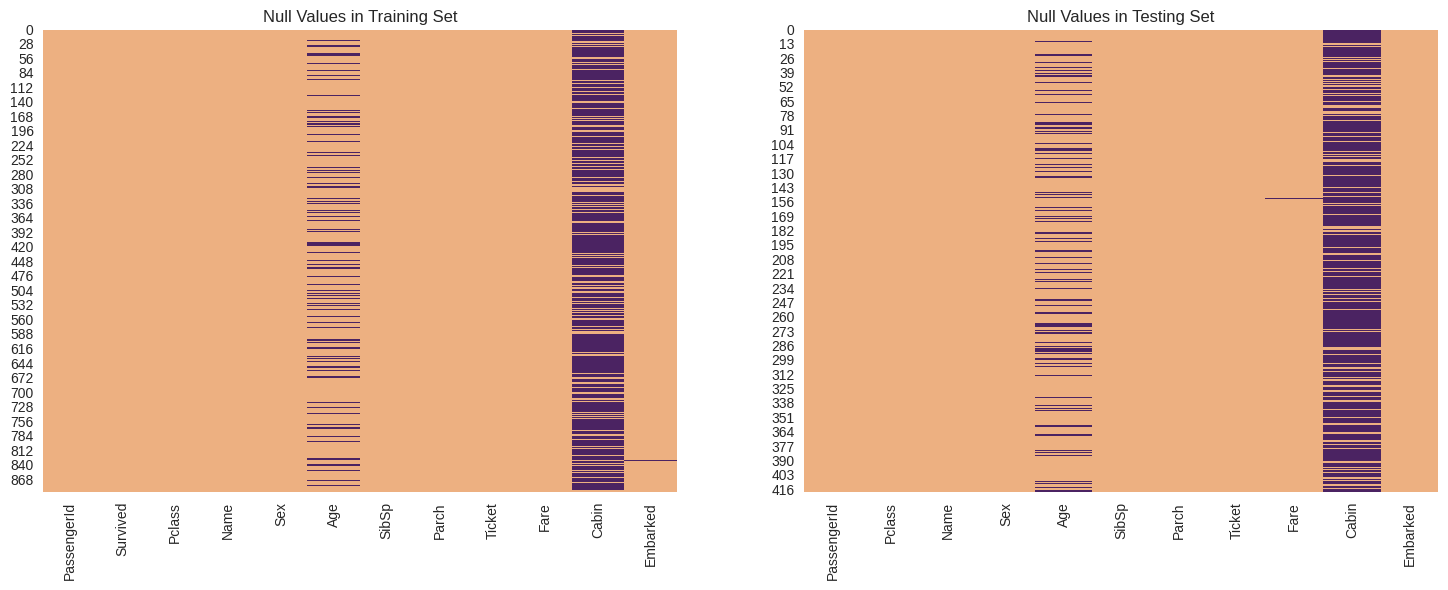

In [ ]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.heatmap(train.isnull(),cbar=False, cmap='flare')
plt.title('Null Values in Training Set')

plt.subplot(1,2,2)
sns.heatmap(test.isnull(),cbar=False, cmap='flare')
plt.title('Null Values in Testing Set')



In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


###3.2 Feature analysis

- **Numerical** - Age,Fare,PassengerId
- **Categorical** - Survived, Pclass, Sex, SibSp, Parch,Embarked
- **Mixed** - Name, Ticket, Cabin

    It includes :

    *   **Univariate Analysis**<br>
            Univariate analysis focuses on analyzing each feature in the datasetindependently.

               *  Distribution analysis: The distribution of each feature is examined to identify its shape, central tendency, and dispersion.

               *  Identifying potential issues: Univariate analysis helps in identifying potential problems with the data such as outliers, skewness, and missing values
    *   **Bivariate Analysis**<br>
            - Select 2 cols
            - Understand type of relationship
            1. **Numerical - Numerical**
                a. You can plot graphs like scatterplot(regression plots), 2D histplot, 2D KDEplots
                b. Check correlation coefficent to check linear relationship
            2. **Numerical - Categorical** - create visualizations that compare the distribution of the numerical data across different categories of the categorical data.
                a. You can plot graphs like barplot, boxplot, kdeplot violinplot even scatterplots
            3. **Categorical - Categorical**
                a. You can create cross-tabulations or contingency tables that show the distribution of values in one categorical column, grouped by the values in the other categorical column.
                b. You can plots like heatmap, stacked barplots, treemaps
                




#### 3.2.1 **Categorical variables**

Categorical variables in our dataset are Sex, Pclass and Embarked.

#### Categorical variable: Sex

In [ ]:
train['Sex'].value_counts(dropna = False)

male      577
female    314
Name: Sex, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

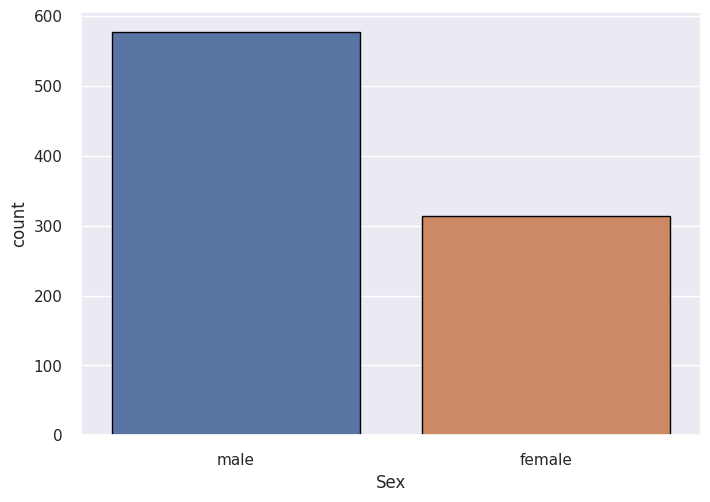

In [ ]:
custom_params = {"axes.spines.right": True, "axes.spines.top": True}

# Set the style
sns.set_style('whitegrid', custom_params)

# Set the theme
sns.set_theme()
sns.countplot(data=train, x='Sex',edgecolor='black')

In [ ]:
train[['Sex','Survived']].groupby('Sex',as_index=False).mean().sort_values(by = 'Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Text(0.5, 1.0, 'Survival Probability by Gender')

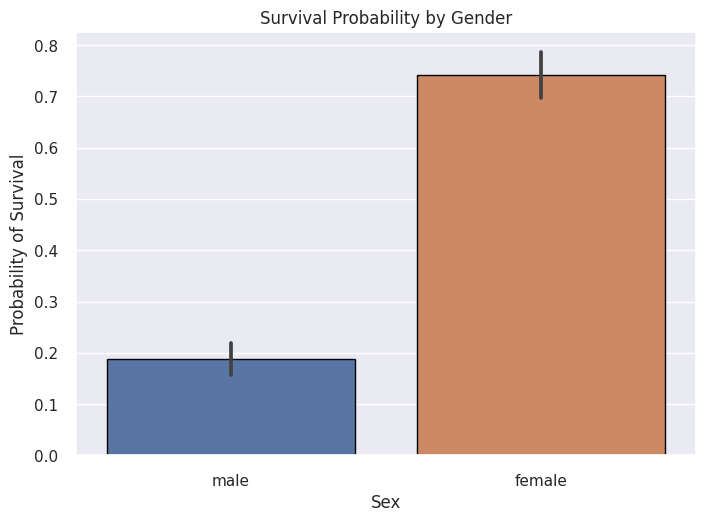

In [ ]:
# Mean of survival by Gender
sns.barplot(x=train.Sex,y=train.Survived,edgecolor='black')
plt.ylabel('Probability of Survival')
plt.title('Survival Probability by Gender')

#### Conclusion:
As per the upper graphs I can say that females had far better survival chance because they prioritize Female to leave the sinking ship.

#### Categorical variable: Pclass

In [ ]:
train['Pclass'].value_counts(dropna = False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


<Axes: xlabel='Pclass', ylabel='count'>

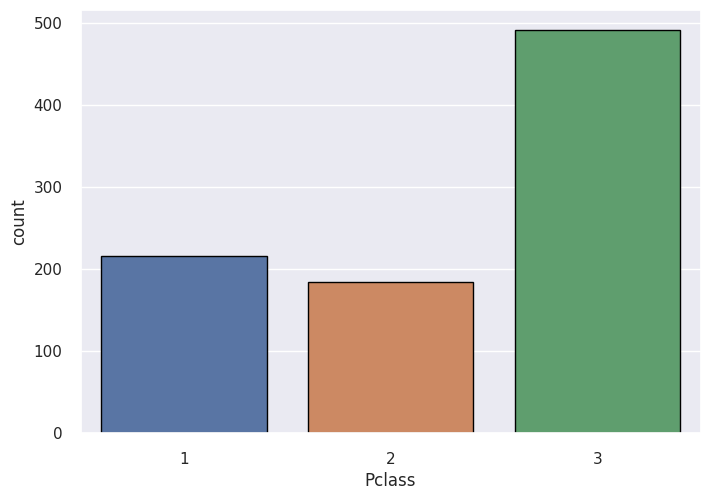

In [ ]:
sns.countplot(data=train, x='Pclass',edgecolor='black')

Text(0.5, 1.0, 'Survival Probability by Passenger Class')

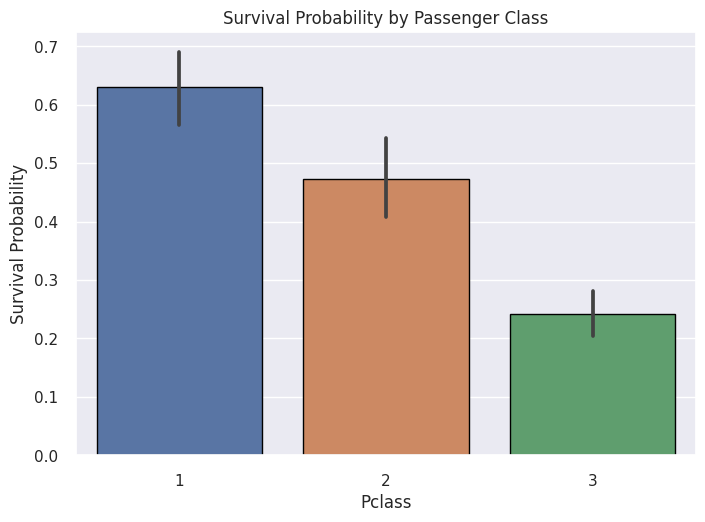

In [ ]:
# Mean of survival by passenger class
sns.barplot(x = 'Pclass', y ='Survived', data = train,edgecolor='black')
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Passenger Class')

<Axes: xlabel='Pclass', ylabel='count'>

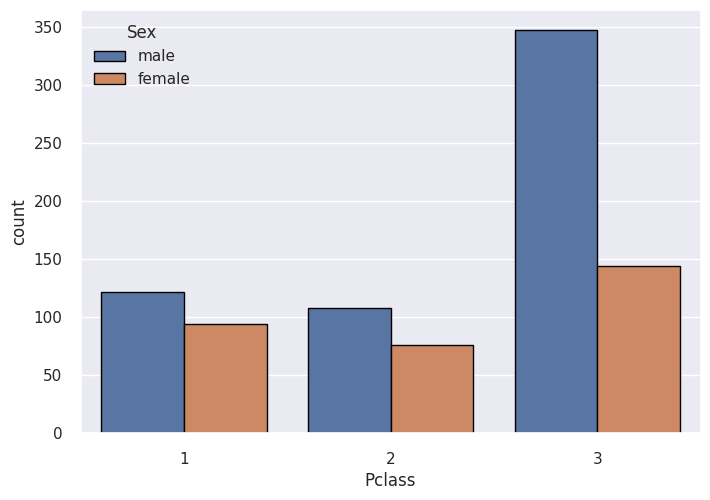

In [ ]:
# count by gender and passenger class
sns.countplot(data=train, x='Pclass',hue='Sex',edgecolor='black')

Text(0.5, 1.0, 'Survival Probability by Sex and Passenger Class')

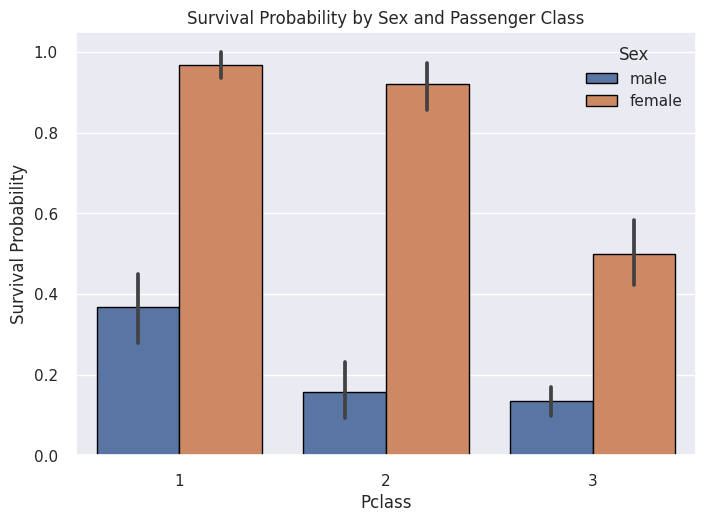

In [ ]:
# Survival by gender and passenger class

sns.barplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = train,edgecolor='black')
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Sex and Passenger Class')

#### Conclusion:
As per the upper graphs I can say that 1st class passangers had far better survival chance. Also, 1st class-woman has the highest survival chance as per two feature.




#### Categorical variable: Embarked



In [ ]:
train['Embarked'].value_counts(dropna = False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [ ]:
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


Text(0.5, 1.0, 'Survival Probability by Point of Embarkation')

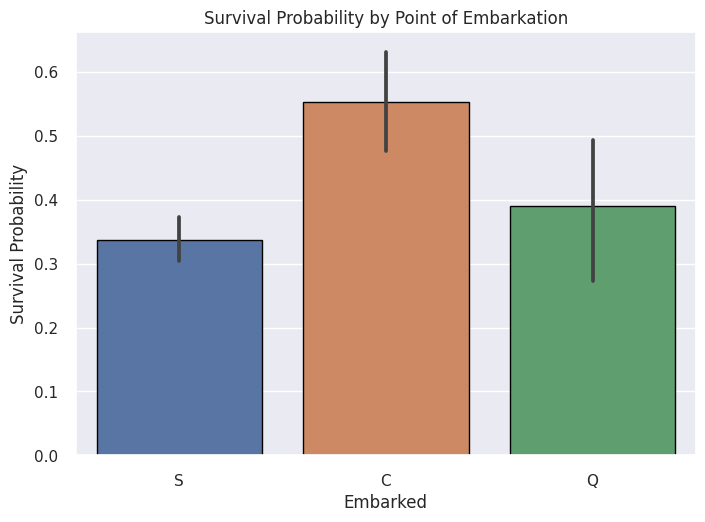

In [ ]:
sns.barplot(x = 'Embarked', y ='Survived', data = train,edgecolor='black')
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Point of Embarkation')

<Axes: xlabel='Embarked', ylabel='count'>

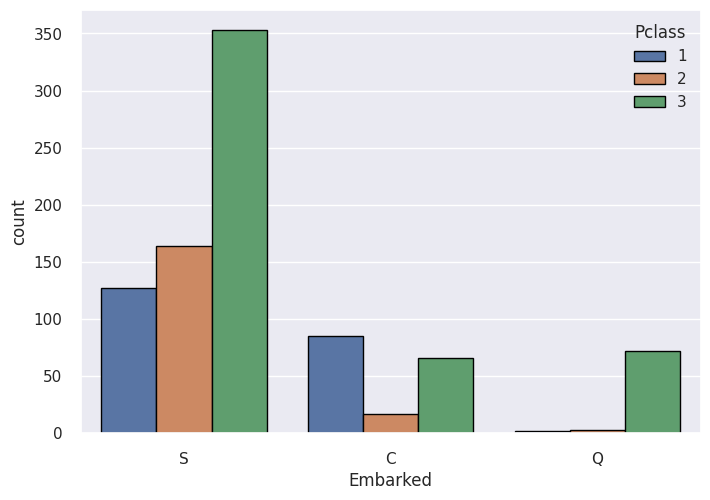

In [ ]:
sns.countplot(data=train,x='Embarked',hue='Pclass',edgecolor='black')

#### Categorical variable: Embarked

In [ ]:
train['Embarked'].value_counts(dropna = False)

# Comment: Two missing values in the Embarked column

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [ ]:
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


Text(0.5, 1.0, 'Survival Probability by Point of Embarkation')

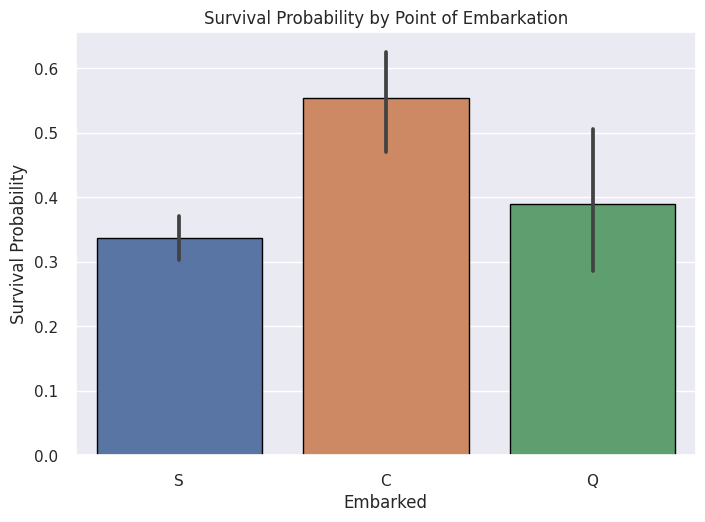

In [ ]:
sns.barplot(x = 'Embarked', y ='Survived', data = train,edgecolor='black')
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Point of Embarkation')

Survival probability is highest for location C and lowest for location S.


That can occur if there is more passenger in 1st class from S .Take the hypothesis.

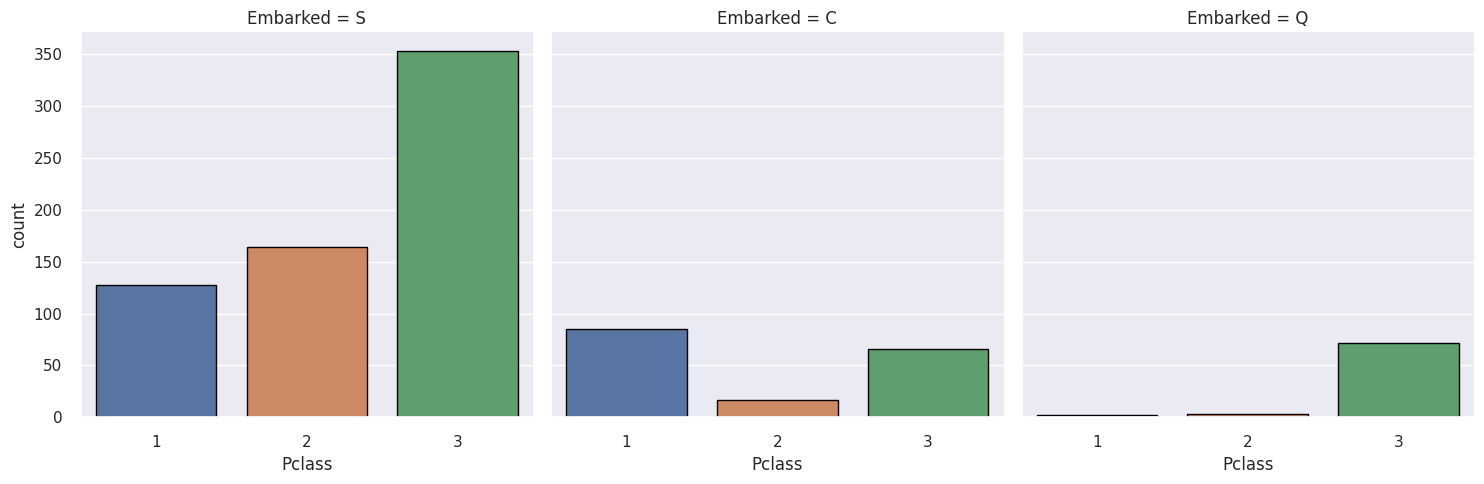

In [ ]:
sns.catplot(x='Pclass', col='Embarked', data=train, kind='count',edgecolor='black')

plt.show()


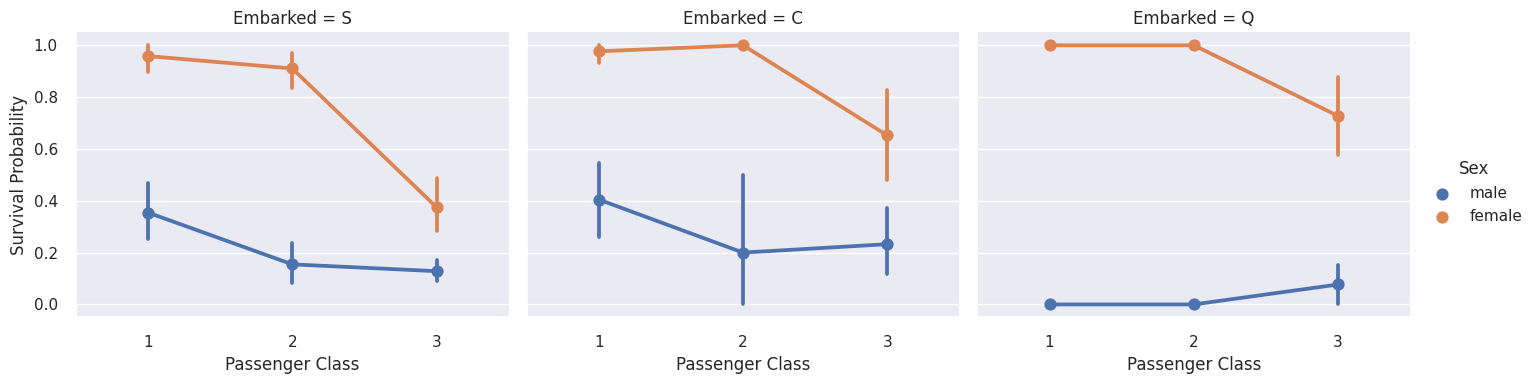

In [ ]:
# Survival probability by all categorical variables
g = sns.catplot(data=train, x='Pclass', y='Survived', hue='Sex', col='Embarked', kind='point', palette='deep', height=4, aspect=1.2)

g.set_axis_labels('Passenger Class', 'Survival Probability')

plt.show()

#### 3.2.2 Numerical variables

In [ ]:
from collections import Counter

#### Remove outliers in numerical variables

Data points that have extreme values and they do not conform with the majority of the data. It is important to address this because outliers tend to skew our data towards extremes and can cause inaccurate model predictions.

<ipython-input-1620-e6e31ddb8c3c>:18: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=train, x='Survived', y='Age', palette=['purple','yellow'], ax=axes[0, 0])
<ipython-input-1620-e6e31ddb8c3c>:19: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=train, x='Survived', y='SibSp', palette=['purple','yellow'], ax=axes[0, 1])
<ipython-input-1620-e6e31ddb8c3c>:20: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=train, x='Survived', y='Parch', palette=['purple','yellow'], ax=axes[1, 0])
<ipython-input-1620-e6e31ddb8c3c>:21: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=train, x='Survived', y='Fare', palette=['purple','yellow'], ax=axes[1, 1])


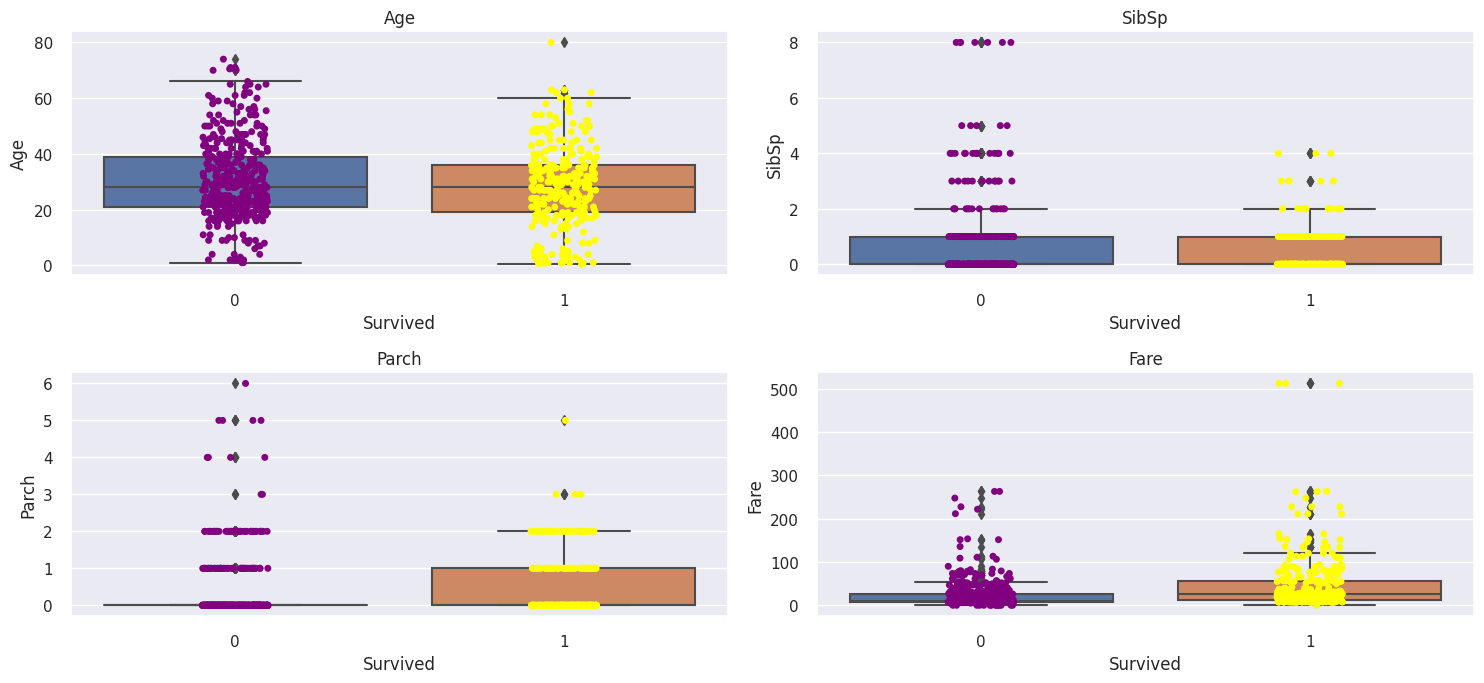

In [ ]:

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 7))

# Plot box plots against 'Survived' for each variable
sns.boxplot(data=train, x='Survived', y='Age', ax=axes[0, 0])
axes[0, 0].set_title('Age')

sns.boxplot(data=train, x='Survived', y='SibSp', ax=axes[0, 1])
axes[0, 1].set_title('SibSp')

sns.boxplot(data=train, x='Survived', y='Parch', ax=axes[1, 0])
axes[1, 0].set_title('Parch')

sns.boxplot(data=train, x='Survived', y='Fare', ax=axes[1, 1])
axes[1, 1].set_title('Fare')

# Highlight potential outliers
sns.stripplot(data=train, x='Survived', y='Age', palette=['purple','yellow'], ax=axes[0, 0])
sns.stripplot(data=train, x='Survived', y='SibSp', palette=['purple','yellow'], ax=axes[0, 1])
sns.stripplot(data=train, x='Survived', y='Parch', palette=['purple','yellow'], ax=axes[1, 0])
sns.stripplot(data=train, x='Survived', y='Fare', palette=['purple','yellow'], ax=axes[1, 1])

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
def detect_outliers(df, n, features):
    outlier_indices = []  # List to store the indices of outliers
    numerical_vars=['Age', 'SibSp', 'Parch', 'Fare']
    # Calculate the IQR range for each numerical variable
    for var in numerical_vars:
        Q1 = train[var].quantile(0.25)
        Q3 = train[var].quantile(0.75)
        IQR = Q3 - Q1

        # Define the upper and lower bounds for outliers
        lower_bound = Q1 - 1.45 * IQR
        upper_bound = Q3 + 1.45 * IQR

        # Identify outliers and store their indices
        outliers = train[(train[var] < lower_bound) | (train[var] > upper_bound)]
        outlier_indices.extend(outliers.index)
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = [key for key, value in outlier_indices.items() if value > n]
    return  multiple_outliers

outliers_to_drop = detect_outliers(train,2, ['Age', 'SibSp', 'Parch', 'Fare'])
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)

We will drop these 12 indices:  [438, 745, 27, 88, 159, 180, 201, 324, 341, 792, 846, 863]


In [ ]:
train.loc[outliers_to_drop, :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.00,C23 C25 C27,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.00,B22,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [ ]:
# Drop outliers and reset index

print("Before: {} rows".format(len(train)))
train = train.drop(outliers_to_drop, axis = 0).reset_index(drop = True)
print("After: {} rows".format(len(train)))

Before: 891 rows
After: 879 rows


<ipython-input-1624-e6e31ddb8c3c>:18: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=train, x='Survived', y='Age', palette=['purple','yellow'], ax=axes[0, 0])
<ipython-input-1624-e6e31ddb8c3c>:19: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=train, x='Survived', y='SibSp', palette=['purple','yellow'], ax=axes[0, 1])
<ipython-input-1624-e6e31ddb8c3c>:20: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=train, x='Survived', y='Parch', palette=['purple','yellow'], ax=axes[1, 0])
<ipython-input-1624-e6e31ddb8c3c>:21: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=train, x='Survived', y='Fare', palette=['purple','yellow'], ax=axes[1, 1])


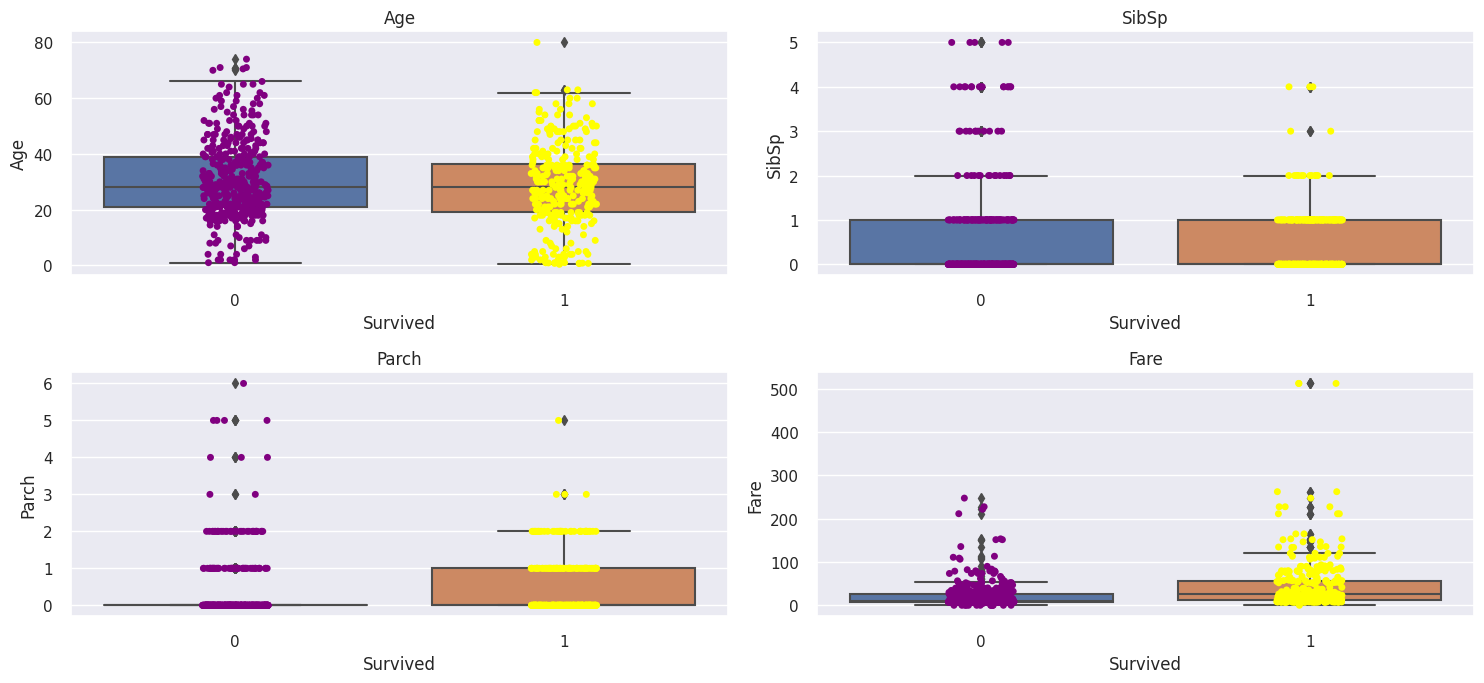

In [ ]:
# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 7))

# Plot box plots against 'Survived' for each variable
sns.boxplot(data=train, x='Survived', y='Age', ax=axes[0, 0])
axes[0, 0].set_title('Age')

sns.boxplot(data=train, x='Survived', y='SibSp', ax=axes[0, 1])
axes[0, 1].set_title('SibSp')

sns.boxplot(data=train, x='Survived', y='Parch', ax=axes[1, 0])
axes[1, 0].set_title('Parch')

sns.boxplot(data=train, x='Survived', y='Fare', ax=axes[1, 1])
axes[1, 1].set_title('Fare')

# Highlight potential outliers
sns.stripplot(data=train, x='Survived', y='Age', palette=['purple','yellow'], ax=axes[0, 0])
sns.stripplot(data=train, x='Survived', y='SibSp', palette=['purple','yellow'], ax=axes[0, 1])
sns.stripplot(data=train, x='Survived', y='Parch', palette=['purple','yellow'], ax=axes[1, 0])
sns.stripplot(data=train, x='Survived', y='Fare', palette=['purple','yellow'], ax=axes[1, 1])

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


#### Numerical variables correlation with survival

<Axes: >

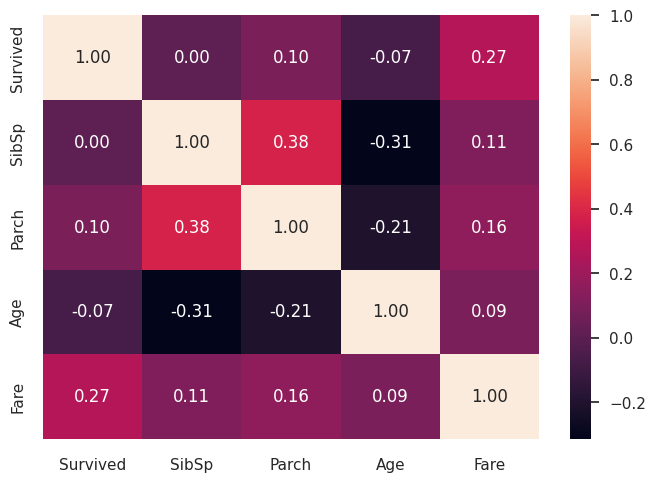

In [ ]:
sns.heatmap(train[['Survived', 'SibSp', 'Parch', 'Age', 'Fare']].corr(), annot = True, fmt = '.2f')

#### Numerical variable: SibSp

In [ ]:
train['SibSp'].value_counts(dropna = False)

0    608
1    207
2     28
4     18
3     13
5      5
Name: SibSp, dtype: int64

In [ ]:
train[['SibSp', 'Survived']].groupby('SibSp', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,SibSp,Survived
1,1,0.541063
2,2,0.464286
0,0,0.345395
4,4,0.166667
3,3,0.153846
5,5,0.000000


Text(0.5, 1.0, 'Survival Probability by SibSp')

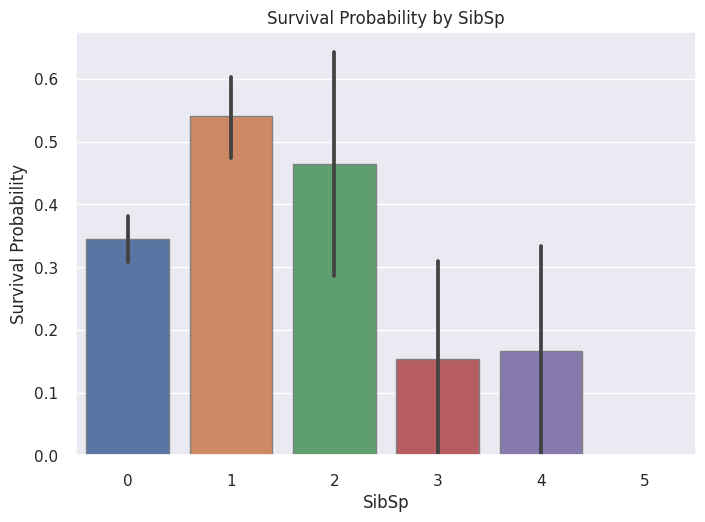

In [ ]:
sns.barplot(x = 'SibSp', y ='Survived', data = train,edgecolor='grey')
plt.ylabel('Survival Probability')
plt.title('Survival Probability by SibSp')

#### Numerical variable: Parch

In [ ]:
train['Parch'].value_counts(dropna = False)

0    678
1    117
2     70
5      5
3      5
4      3
6      1
Name: Parch, dtype: int64

In [ ]:
train[['Parch', 'Survived']].groupby('Parch', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.555556
2,2,0.542857
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Text(0.5, 1.0, 'Survival Probability by Parch')

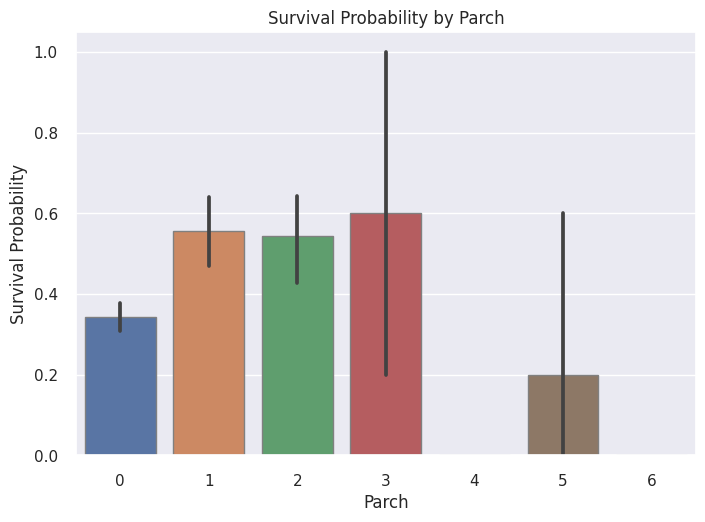

In [ ]:
sns.barplot(x = 'Parch', y ='Survived', data = train,edgecolor='grey')
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Parch')

#### Numerical variable: Age

In [ ]:
# Null values in Age column

train['Age'].isnull().sum()

170

Text(0.5, 1.0, 'Passenger Age Distribution')

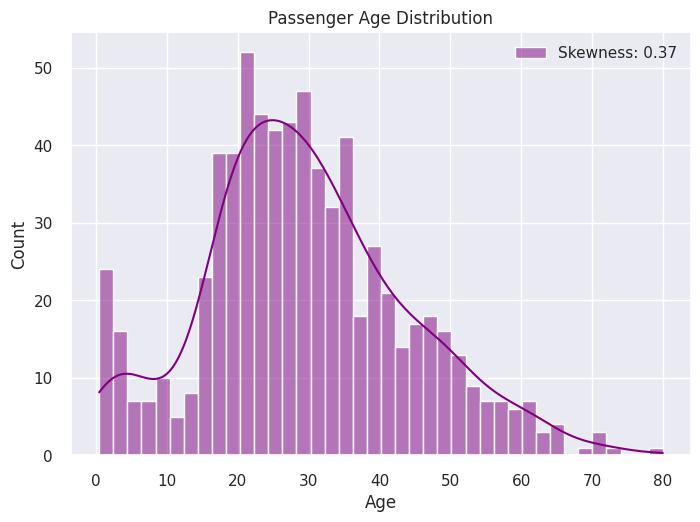

In [ ]:
# Passenger age distribution

sns.histplot(train['Age'], label = 'Skewness: %.2f'%(train['Age'].skew()),color='purple',kde=True,bins=40)
plt.legend(loc = 'best')
plt.title('Passenger Age Distribution')

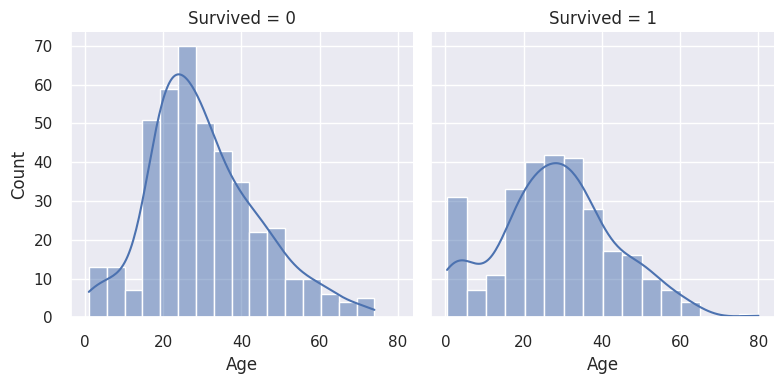

In [ ]:
# Passenger age distribution by survival
g = sns.FacetGrid(train, col='Survived', height=4, aspect=1)
g.map(sns.histplot, 'Age', kde=True)

# Set the x-axis label
g.set_xlabels('Age')

# Set the titles
g.set_titles('Survived = {col_name}')

# Show the plot
plt.show()

Text(0.5, 1.0, 'Passenger Age Distribution by Survival')

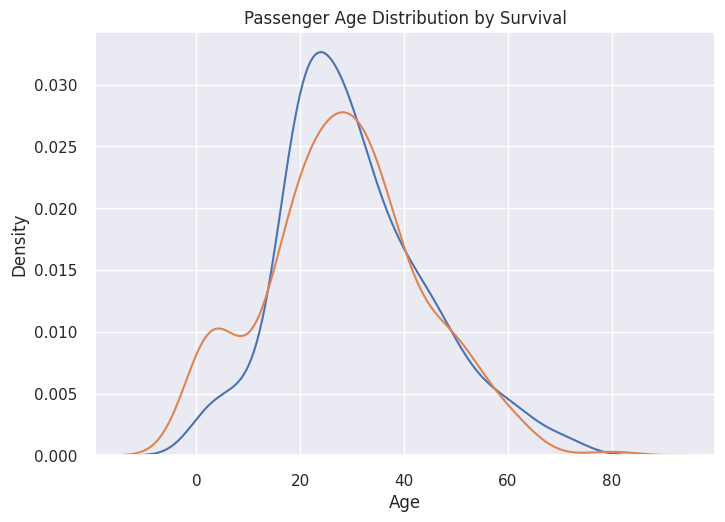

In [ ]:
sns.kdeplot(train['Age'][train['Survived'] == 0], label = 'Did not survive')
sns.kdeplot(train['Age'][train['Survived'] == 1], label = 'Survived')
plt.xlabel('Age')
plt.title('Passenger Age Distribution by Survival')

#### Numerical variable: Fare

In [ ]:
# Null values of Fare column

train['Fare'].isnull().sum()

0

<ipython-input-1637-eca803f431cf>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Fare'],label = 'Skewness: %.2f'%(train['Fare'].skew()),kde_kws={'bw_adjust':0.16},bins=80)


Text(0.5, 1.0, 'Passenger Fare Distribution')

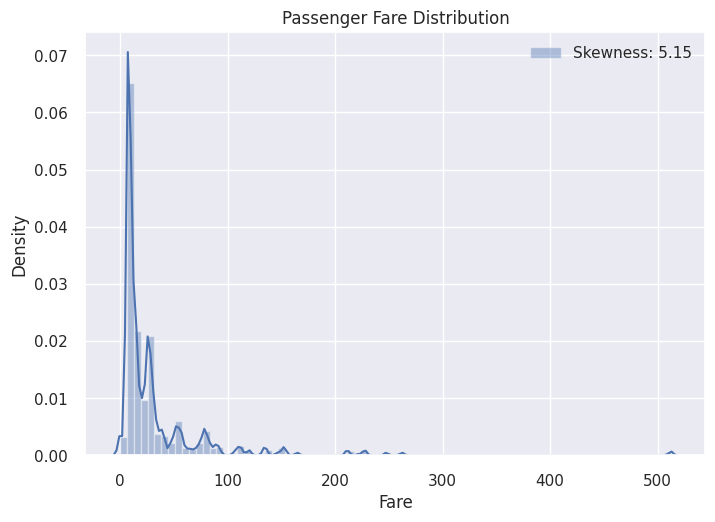

In [ ]:
sns.distplot(train['Fare'],label = 'Skewness: %.2f'%(train['Fare'].skew()),kde_kws={'bw_adjust':0.16},bins=80)
plt.legend(loc = 'best')
# Set the axis labels and title
plt.xlabel('Fare')
plt.ylabel('Density')
plt.title('Passenger Fare Distribution')


## 4. Data preprocessing

Data preprocessing is the process of getting our dataset ready for model training:

- Drop and fill missing values
- Data trasformation (log transformation)
- Feature engineering
- Feature encoding

#### Drop and fill missing values

In [ ]:
#we can also drop the Ticket feature since it's unlikely to yield any useful information
train = train.drop(['Ticket','PassengerId'], axis = 1)
test = test.drop(['Ticket','PassengerId'], axis = 1)

In [ ]:
# Missing values in training set

train.isnull().sum().sort_values(ascending = False)

Cabin       680
Age         170
Embarked      2
Survived      0
Pclass        0
Name          0
Sex           0
SibSp         0
Parch         0
Fare          0
dtype: int64

In [ ]:
mode = train['Embarked'].dropna().mode()[0]
train['Embarked'].fillna(mode,inplace=True)

In [ ]:
# Missing values
print(train.isnull().sum().sort_values(ascending = False))
print('**'*26)
print(test.isnull().sum().sort_values(ascending = False))

Cabin       680
Age         170
Survived      0
Pclass        0
Name          0
Sex           0
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64
****************************************************
Cabin       327
Age          86
Fare          1
Pclass        0
Name          0
Sex           0
SibSp         0
Parch         0
Embarked      0
dtype: int64


In [ ]:
median = test['Fare'].dropna().median()
test['Fare'].fillna(median,inplace=True)

In [ ]:
print(train.isnull().sum().sort_values(ascending = False))
print('**'*26)
print(test.isnull().sum().sort_values(ascending = False))

Cabin       680
Age         170
Survived      0
Pclass        0
Name          0
Sex           0
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64
****************************************************
Cabin       327
Age          86
Pclass        0
Name          0
Sex           0
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64


In [ ]:
df = pd.concat([train, test], axis = 0).reset_index(drop = True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [ ]:
df.isnull().sum().sort_values(ascending = False)

Cabin       1007
Survived     418
Age          256
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

I will use features that are most correlated with Age to predict the values for Age. But first, we need to convert Sex into numerical values where 0 = male and 1 = female.

In [ ]:
df['Sex'] = df.Sex.apply(lambda x: 0 if x == "female" else 1)

In [ ]:
df


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,NaN,S
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C85,C
2,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,NaN,S
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,C123,S
4,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1292,NaN,3,"Spector, Mr. Woolf",1,NaN,0,0,8.0500,NaN,S
1293,NaN,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,108.9000,C105,C
1294,NaN,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,7.2500,NaN,S
1295,NaN,3,"Ware, Mr. Frederick",1,NaN,0,0,8.0500,NaN,S


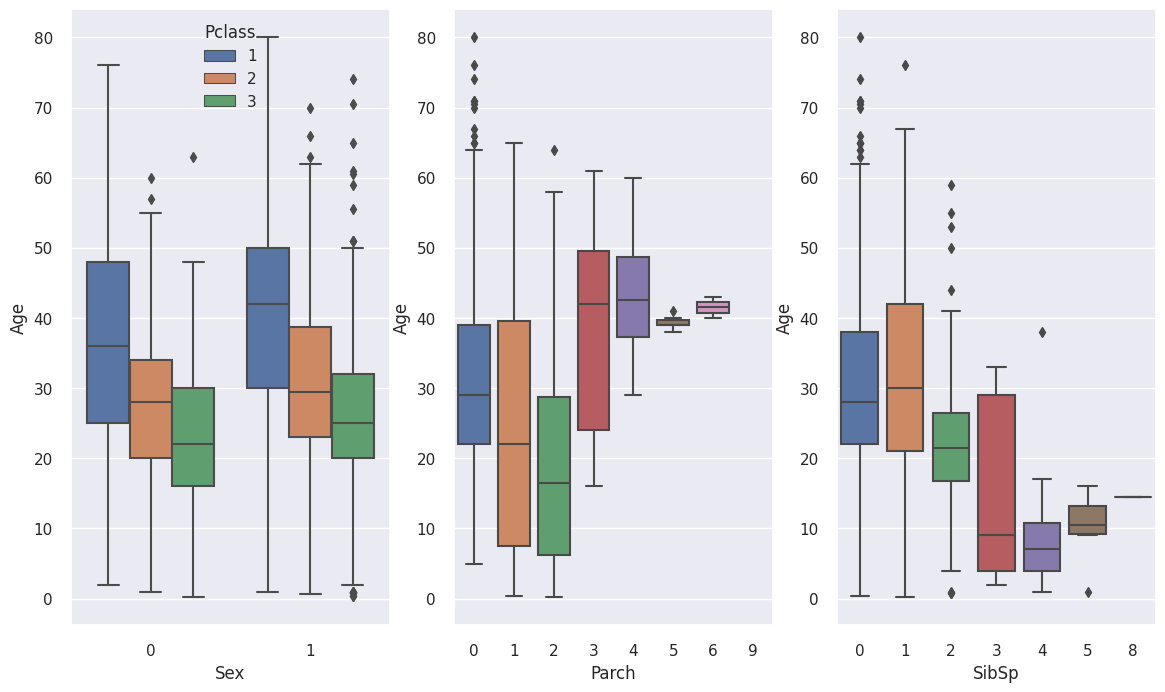

In [ ]:
fig = plt.figure(figsize=(14, 8))
plt.subplot(1,3,1)
sns.boxplot(y = 'Age', x = 'Sex', hue = 'Pclass', data = df)
plt.subplot(1,3,2)
sns.boxplot(y = 'Age', x = 'Parch', data = df)
plt.subplot(1,3,3)
sns.boxplot(y = 'Age', x = 'SibSp', data = df)
plt.legend(loc='best')

# plt.tight_layout()

<ipython-input-1649-238af3089372>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.drop(['Survived', 'Name', 'Fare'], axis = 1).corr(), annot = True)


<Axes: >

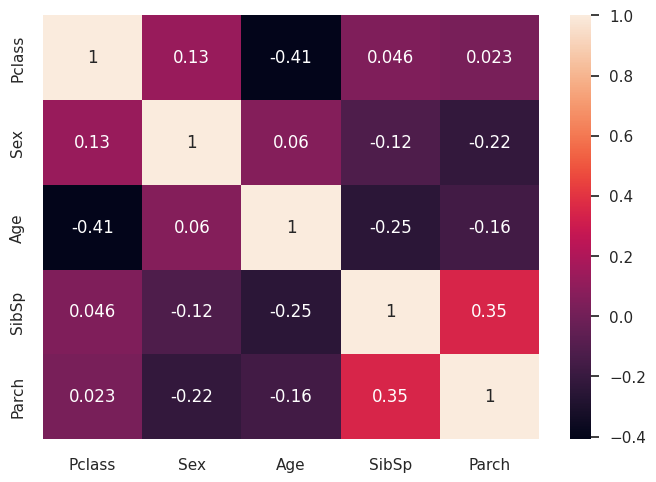

In [ ]:
sns.heatmap(df.drop(['Survived', 'Name', 'Fare'], axis = 1).corr(), annot = True)

#### Title feature
But before that I would to add a feature from Name feature called Title and see if it related to it.Extract the titles from the 'Name' column (e.g., Mr, Mrs, Miss) as a separate categorical feature, which can provide insights into social status or gender.

In [ ]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
cross_tab = pd.crosstab(df['Title'], df['Sex'])
cross_tab

Sex,0,1
Title,,
Col,0,4
Countess,1,0
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,60


In [ ]:
#replace various titles with more common names
df['Title'] = df['Title'].replace(['Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')
df['Title']

0           Mr
1          Mrs
2         Miss
3          Mrs
4           Mr
         ...  
1292        Mr
1293      Rare
1294        Mr
1295        Mr
1296    Master
Name: Title, Length: 1297, dtype: object

In [ ]:
pd.crosstab(df['Title'], df['Sex'])

Sex,0,1
Title,,
Master,0,60
Miss,259,0
Mr,0,752
Mrs,198,0
Rare,2,23
Royal,2,1


In [ ]:
df[['Title', 'Survived','Age', 'Sex']].groupby(['Title', 'Sex'], as_index=False).mean().dropna().sort_values(by='Age')

,Title,Sex,Survived,Age
0,Master,1,0.589744,5.482642
1,Miss,0,0.711111,21.808483
2,Mr,1,0.158203,32.220207
3,Mrs,0,0.793651,36.918129
6,Royal,0,1.000000,40.500000
4,Rare,0,1.000000,44.000000
5,Rare,1,0.222222,44.409091
7,Royal,1,1.000000,49.000000


In [ ]:
# title_mapping = {"Mr": 3, "Miss": 2, "Mrs": 4, "Master": 1, "Royal": 6, "Rare": 5}
# df[['Title']] = df[['Title']].replace(title_mapping)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,NaN,S,Mr
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C85,C,Mrs
2,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,NaN,S,Miss
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,C123,S,Mrs
4,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,NaN,S,Mr


In [ ]:
df[['Title']].value_counts()

Title 
Mr        752
Miss      259
Mrs       198
Master     60
Rare       25
Royal       3
dtype: int64

<ipython-input-1656-ce940ccb4394>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.drop(columns=['Survived']).corr()['Age'].abs().sort_values(ascending=False)


<Axes: >

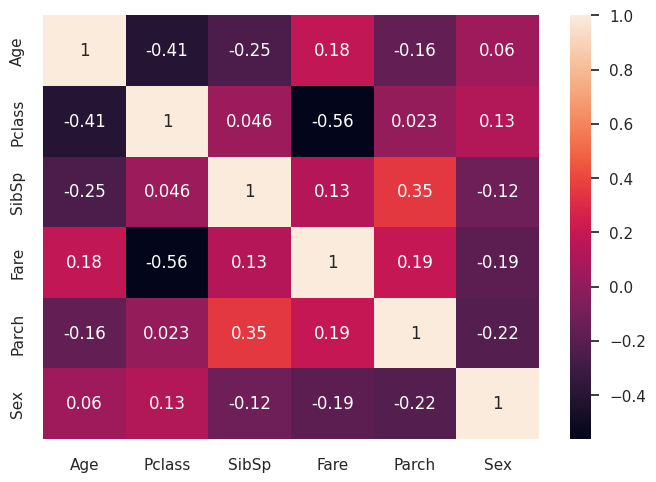

In [ ]:
correlation = df.drop(columns=['Survived']).corr()['Age'].abs().sort_values(ascending=False)
sns.heatmap(df[correlation.index].corr(), annot=True)

**Conclusion**: My assumption was correct. The title and Age are corelated Royal are usually old people and Masters are usually litle.
Age is not correlated with Sex but is negatively correlated with Pclass,SibSp, and Parch and positively correlated with Title and Fare.

#### Droping Missing value p2

In [ ]:
# Missing values
print(train.isnull().sum().sort_values(ascending = False))
print('**'*26)
print(test.isnull().sum().sort_values(ascending = False))


Cabin       680
Age         170
Survived      0
Pclass        0
Name          0
Sex           0
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64
****************************************************
Cabin       327
Age          86
Pclass        0
Name          0
Sex           0
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64


In [ ]:
correlation

Age       1.000000
Pclass    0.408081
SibSp     0.246542
Fare      0.180044
Parch     0.162902
Sex       0.059873
Name: Age, dtype: float64

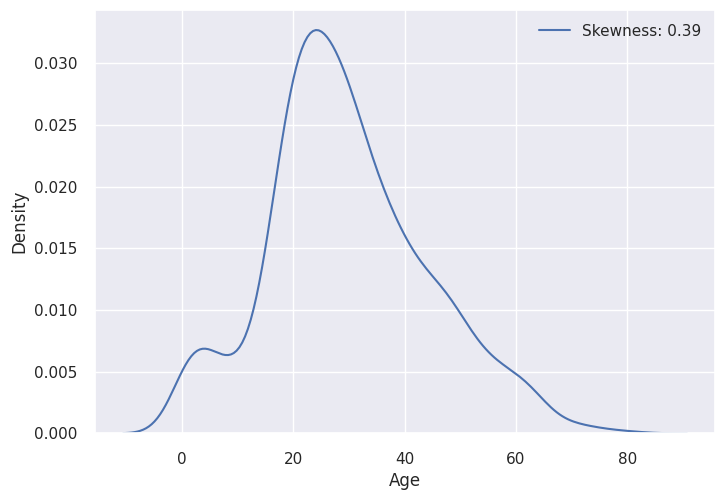

In [ ]:
sns.kdeplot(df['Age'],label = 'Skewness: %.2f'%(df['Age'].skew()))
plt.legend(loc='best')

Considering that the skewness of the 'Age' column is relatively small (0.41), using the mean or median to fill missing age values can be a useful approach

In [ ]:
age_nan_indices = list(df[df['Age'].isnull()].index)
len(age_nan_indices)

256

The approach involves assigning the median age of the entire column as the default value. It then considers the median age of individuals with the same 'Pclass' and, if available, the median age of individuals with matching 'SibSp', 'Parch', 'Pclass', and 'Title'. If no valid median age is found, the missing value is filled with the overall median. Finally, the primary age is used unless it is less than the predicted age, in which case the predicted age is chosen.

In [ ]:
for index in age_nan_indices:
    median_age = df['Age'].median()
    primary_mage = df['Age'][(df['Pclass'] == df.iloc[index]["Pclass"])].median()
    predict_age = df['Age'][(df['SibSp'] == df.iloc[index]['SibSp'])
                                 & (df['Parch'] == df.iloc[index]['Parch'])
                                 & (df['Pclass'] == df.iloc[index]["Pclass"])
                                 & (df['Title'] == df.iloc[index]["Title"])].median()
    if np.isnan(predict_age):
        df['Age'].iloc[index] = median_age
    else:
        if np.isnan(predict_age):
            df['Age'].iloc[index] = primary_mage
        else:
            df['Age'].iloc[index] = predict_age

<ipython-input-1661-b846150c4a87>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'].iloc[index] = predict_age
<ipython-input-1661-b846150c4a87>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'].iloc[index] = predict_age
<ipython-input-1661-b846150c4a87>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'].iloc[index] = predict_age
<ipython-input-1661-b846150c4a87>:14: SettingWithCopyWarning: 
A value is tryin

In [ ]:
df.isnull().sum()

Survived     418
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin       1007
Embarked       0
Title          0
dtype: int64

#### Data transformation
our passenger fare column has a very high positive skewness. Therefore, we will apply a log transformation to address this issue.

Text(0.5, 1.0, 'Passenger Fare Distribution')

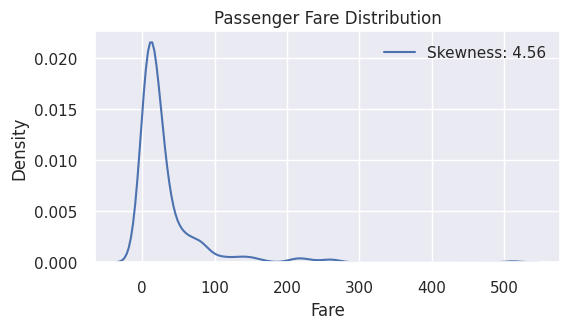

In [ ]:
plt.figure(figsize=(6, 3))
sns.kdeplot(df['Fare'], label = 'Skewness: %.2f'%(df['Fare'].skew()),)
plt.legend(loc = 'best')
plt.title('Passenger Fare Distribution')

In [ ]:
df['Fare']=df['Fare'].map(lambda x: np.log(x)if x>0 else 0)

Text(0.5, 1.0, 'Passenger Fare Distribution')

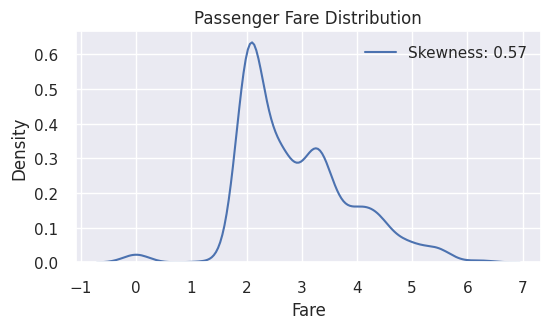

In [ ]:
plt.figure(figsize=(6, 3))
sns.kdeplot(df['Fare'], label = 'Skewness: %.2f'%(df['Fare'].skew()),)
plt.legend(loc = 'best')
plt.title('Passenger Fare Distribution')

In [ ]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,1.981001,NaN,S,Mr
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,4.266662,C85,C,Mrs
2,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,2.070022,NaN,S,Miss
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,3.972177,C123,S,Mrs
4,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,2.085672,NaN,S,Mr


##5. Feature Engeneering
It is the process of creating new features from existing features to better represent the underlying problem to the predictive models resulting in improved model accuracy on unseen data.

### Cabinbool

In [ ]:
df["CabinBool"] = (df["Cabin"].notnull().astype('int'))
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,CabinBool
0,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,1.981001,NaN,S,Mr,0
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,4.266662,C85,C,Mrs,1
2,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,2.070022,NaN,S,Miss,0
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,3.972177,C123,S,Mrs,1
4,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,2.085672,NaN,S,Mr,0


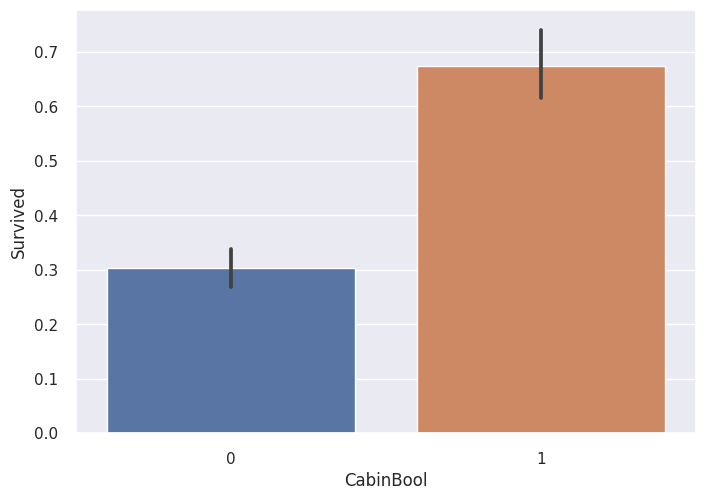

Percentage of CabinBool = 1 who survived: 67.34%
Percentage of CabinBool = 0 who survived: 30.29%


In [ ]:
sns.barplot(x='CabinBool', y='Survived', data=df)
plt.legend()
plt.show()
print("Percentage of CabinBool = 1 who survived: %.2f%%" % (df["Survived"][df["CabinBool"] == 1].value_counts(normalize=True)[1] * 100))
print("Percentage of CabinBool = 0 who survived: %.2f%%" % (df["Survived"][df["CabinBool"] == 0].value_counts(normalize=True)[1] * 100))

In [ ]:
df.drop(['Cabin','Name'],axis=1,inplace=True)

In [ ]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,CabinBool
0,0.0,3,1,22.0,1,0,1.981001,S,Mr,0
1,1.0,1,0,38.0,1,0,4.266662,C,Mrs,1


### AgeGroup
'AgeGroup' is a feature that categorizes individuals into different age groups, allowing for simplified analysis and capturing age-related patterns. Where There is Ordering is Categorial.

In [ ]:
age_groups = ['Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
age_bins = [0, 5, 12, 18, 25, 40, 60, np.inf]
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_groups, right=False)

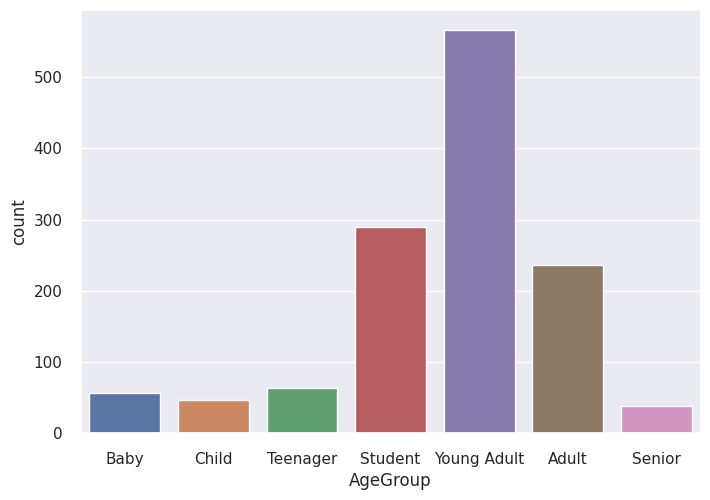

In [ ]:
sns.countplot(x="AgeGroup", data=df)
plt.show()

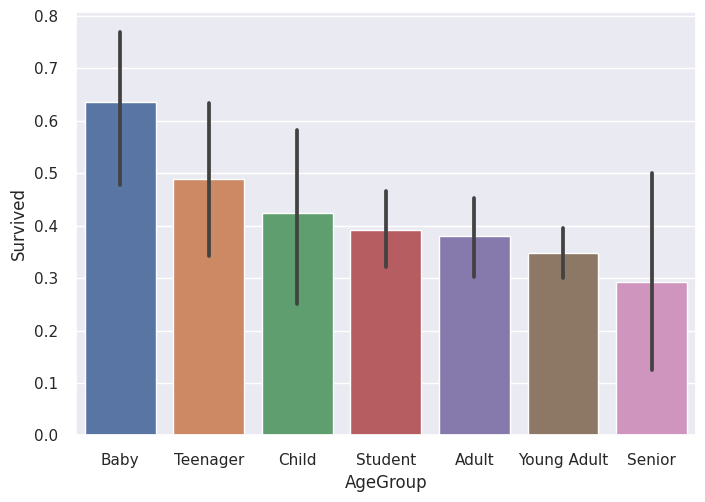

Young Adult    43.639167
Student        22.359291
Adult          18.272938
Teenager        4.857363
Baby            4.317656
Child           3.623747
Senior          2.929838
Name: AgeGroup, dtype: float64

In [ ]:
age_group_order = df.groupby("AgeGroup")["Survived"].mean().sort_values(ascending=False).index

sns.barplot(x="AgeGroup", y="Survived", data=df,order=age_group_order)
plt.show()
df['AgeGroup'].value_counts(normalize = True)[:]*100


### AgeGroupClass
To create our new AgeGroupClass feature, we need to first transform AgeGruop into an ordinal variable. Ordinal variable is much like a categorical variable but with intrisinc ordering in their values.
AgeGroupClass is a feature that is age is divided into combining ageGroup and Pclass

In [ ]:
age_title_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
df['AgeGroup']=df['AgeGroup'].map(age_title_mapping)


In [ ]:
df[['AgeGroup', 'Age', 'Survived', 'Sex']].groupby(['AgeGroup', 'Sex'], as_index=False).mean().sort_values(by='AgeGroup')


,AgeGroup,Sex,Age,Survived
0,1,0,2.120741,0.650000
1,1,1,1.985517,0.625000
2,2,0,7.404762,0.388889
3,2,1,7.980769,0.466667
4,3,0,15.316667,0.826087
5,3,1,15.651515,0.136364
6,4,0,21.261029,0.750000
7,4,1,21.149351,0.098039
8,5,0,31.723270,0.787037
9,5,1,29.106880,0.179211


In [ ]:
df.isnull().sum()

Survived     418
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Title          0
CabinBool      0
AgeGroup       0
dtype: int64

In [ ]:
df['AgeGroup'] = df['AgeGroup'].apply(lambda x: int(x)).astype(int)
df['AgeGroup'].value_counts()


5    566
4    290
6    237
3     63
1     56
2     47
7     38
Name: AgeGroup, dtype: int64

In [ ]:
df[['AgeGroup', 'Pclass']].dtypes

AgeGroup    int64
Pclass      int64
dtype: object

In [ ]:
df['AgeGroupclass'] = df['AgeGroup'] * df['Pclass']
df[['Age', 'Pclass', 'AgeGroupclass']].head()

,Age,Pclass,AgeGroupclass
0,22.0,3,12
1,38.0,1,5
2,26.0,3,15
3,35.0,1,5
4,35.0,3,15


In [ ]:
## Drop Age
df.drop(['Age'],axis=1,inplace=True)

In [ ]:
df.head(5)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,CabinBool,AgeGroup,AgeGroupclass
0,0.0,3,1,1,0,1.981001,S,Mr,0,4,12
1,1.0,1,0,1,0,4.266662,C,Mrs,1,5,5
2,1.0,3,0,0,0,2.070022,S,Miss,0,5,15
3,1.0,1,0,1,0,3.972177,S,Mrs,1,5,5
4,0.0,3,1,0,0,2.085672,S,Mr,0,5,15


### Family_size

In [ ]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df[['SibSp', 'Parch', 'FamilySize']].head(10)

,SibSp,Parch,FamilySize
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1
5,0,0,1
6,0,0,1
7,3,1,5
8,0,2,3
9,1,0,2


In [ ]:
df['FamilySize'].value_counts()

1     790
2     235
3     158
4      43
5      22
6      21
7      16
8       8
11      4
Name: FamilySize, dtype: int64

In [ ]:
# Mean of survival by family size

df[['FamilySize', 'Survived']].groupby('FamilySize', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,FamilySize,Survived
3,4,0.724138
2,3,0.584158
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.055556
7,8,0.000000
8,11,NaN


In [ ]:
df['FamilySize'] = pd.cut(df['FamilySize'], bins=[0, 1, 4, df['FamilySize'].max()+1], labels=['Alone', 'Small_fam', 'Large_fam'])

In [ ]:
df

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,CabinBool,AgeGroup,AgeGroupclass,FamilySize
0,0.0,3,1,1,0,1.981001,S,Mr,0,4,12,Small_fam
1,1.0,1,0,1,0,4.266662,C,Mrs,1,5,5,Small_fam
2,1.0,3,0,0,0,2.070022,S,Miss,0,5,15,Alone
3,1.0,1,0,1,0,3.972177,S,Mrs,1,5,5,Small_fam
4,0.0,3,1,0,0,2.085672,S,Mr,0,5,15,Alone
...,...,...,...,...,...,...,...,...,...,...,...,...
1292,NaN,3,1,0,0,2.085672,S,Mr,0,5,15,Alone
1293,NaN,1,0,0,0,4.690430,C,Rare,1,5,5,Alone
1294,NaN,3,1,0,0,1.981001,S,Mr,0,5,15,Alone
1295,NaN,3,1,0,0,2.085672,S,Mr,0,5,15,Alone


In [ ]:
df.drop(['SibSp','Parch'],axis=1,inplace=True)

### FareBand

In [ ]:
# Create Fare bands and compute mean of survival by fare bands
df['Fare'] = pd.cut(df['Fare'], 5, labels=[1, 2, 3, 4, 5]).astype('int')
fare_survival_mean = df[['Fare', 'Survived']].groupby('Fare', as_index=False).mean().sort_values(by='Fare')

In [ ]:
df.rename(columns={'Fare': 'Fare_band'},inplace=True)
fare_survival_mean

,Fare,Survived
0,1,0.066667
1,2,0.225627
2,3,0.431884
3,4,0.674074
4,5,0.720000


<ipython-input-1690-2d3646dd07cf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True)


<Axes: >

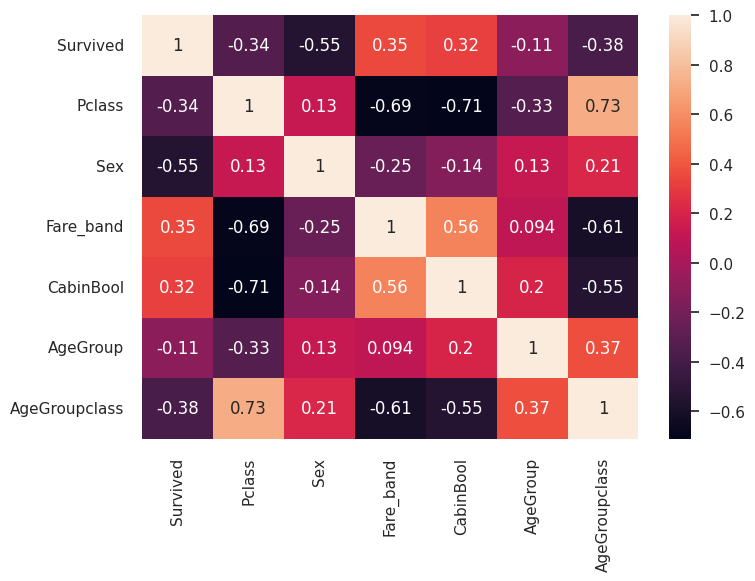

In [ ]:
sns.heatmap(df.corr(),annot = True)

### Feature encoding

Machine learning models require all input and output variables to be numeric. Therefore, we need to encode all of our categorical data before we can fit the models to our data.

Previously, we have encoded the sex column such that 1 = male and 0 = female. We need to repeat this process for Title,Embarked,FamilySize,. In addition, similar to the age column, I will also transform Fare into an ordinal variable rather than a continuous variable.

In [ ]:
df.head()

,Survived,Pclass,Sex,Fare_band,Embarked,Title,CabinBool,AgeGroup,AgeGroupclass,FamilySize
0,0.0,3,1,2,S,Mr,0,4,12,Small_fam
1,1.0,1,0,4,C,Mrs,1,5,5,Small_fam
2,1.0,3,0,2,S,Miss,0,5,15,Alone
3,1.0,1,0,4,S,Mrs,1,5,5,Small_fam
4,0.0,3,1,2,S,Mr,0,5,15,Alone


In [ ]:
# Encode Title ,FamilySize ,Embarked feature
df = pd.get_dummies(df, columns = ['Title'])
df = pd.get_dummies(df, columns = ['Embarked'], prefix = 'Em')
df = pd.get_dummies(df, columns = ['FamilySize'])
df.head()

,Survived,Pclass,Sex,Fare_band,CabinBool,AgeGroup,AgeGroupclass,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Title_Royal,Em_C,Em_Q,Em_S,FamilySize_Alone,FamilySize_Small_fam,FamilySize_Large_fam
0,0.0,3,1,2,0,4,12,0,0,1,0,0,0,0,0,1,0,1,0
1,1.0,1,0,4,1,5,5,0,0,0,1,0,0,1,0,0,0,1,0
2,1.0,3,0,2,0,5,15,0,1,0,0,0,0,0,0,1,1,0,0
3,1.0,1,0,4,1,5,5,0,0,0,1,0,0,0,0,1,0,1,0
4,0.0,3,1,2,0,5,15,0,0,1,0,0,0,0,0,1,1,0,0


### Pre-Modeling

In [ ]:
# Separate training and test set from the combined dataframe

train = df[:len(train)]
test = df[len(train):]

In [ ]:
train['Survived'] = train['Survived'].astype('int')
train.head()

<ipython-input-1694-531e899d5cf0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Survived'] = train['Survived'].astype('int')


,Survived,Pclass,Sex,Fare_band,CabinBool,AgeGroup,AgeGroupclass,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Title_Royal,Em_C,Em_Q,Em_S,FamilySize_Alone,FamilySize_Small_fam,FamilySize_Large_fam
0,0,3,1,2,0,4,12,0,0,1,0,0,0,0,0,1,0,1,0
1,1,1,0,4,1,5,5,0,0,0,1,0,0,1,0,0,0,1,0
2,1,3,0,2,0,5,15,0,1,0,0,0,0,0,0,1,1,0,0
3,1,1,0,4,1,5,5,0,0,0,1,0,0,0,0,1,0,1,0
4,0,3,1,2,0,5,15,0,0,1,0,0,0,0,0,1,1,0,0


In [ ]:
test.head()

,Survived,Pclass,Sex,Fare_band,CabinBool,AgeGroup,AgeGroupclass,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Title_Royal,Em_C,Em_Q,Em_S,FamilySize_Alone,FamilySize_Small_fam,FamilySize_Large_fam
879,NaN,3,1,2,0,5,15,0,0,1,0,0,0,0,1,0,1,0,0
880,NaN,3,0,2,0,6,18,0,0,0,1,0,0,0,0,1,0,1,0
881,NaN,2,1,2,0,7,14,0,0,1,0,0,0,0,1,0,1,0,0
882,NaN,3,1,2,0,5,15,0,0,1,0,0,0,0,0,1,1,0,0
883,NaN,3,0,3,0,4,12,0,0,0,1,0,0,0,0,1,0,1,0


In [ ]:
# Drop passenger survived column from test set

test = test.drop('Survived', axis = 1)
test.head()

,Pclass,Sex,Fare_band,CabinBool,AgeGroup,AgeGroupclass,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Title_Royal,Em_C,Em_Q,Em_S,FamilySize_Alone,FamilySize_Small_fam,FamilySize_Large_fam
879,3,1,2,0,5,15,0,0,1,0,0,0,0,1,0,1,0,0
880,3,0,2,0,6,18,0,0,0,1,0,0,0,0,1,0,1,0
881,2,1,2,0,7,14,0,0,1,0,0,0,0,1,0,1,0,0
882,3,1,2,0,5,15,0,0,1,0,0,0,0,0,1,1,0,0
883,3,0,3,0,4,12,0,0,0,1,0,0,0,0,1,0,1,0


## 6. Modelling

I have chosen the following classifiers for the job:

Logistic regression
Support vector machines
K-nearest neighbours
Gaussian naive bayes
Perceptron
Linear SVC
Stochastic gradient descent
Decision tree
Random forest
CatBoost
In this section of the notebook, I will fit the models to the training set as outlined above and evaluate their accuracy at making predictions.

In [ ]:
pip install catboost


###  Split training data

In [ ]:
x_train = train.drop('Survived', axis = 1)
y_train = train['Survived']
x_test = test.copy()
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", x_test.shape)

x_train shape:  (879, 18)
y_train shape:  (879,)
x_test shape:  (418, 18)


In [ ]:
# Machine learning models
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
# Model evaluation
from sklearn.model_selection import cross_val_score

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_train,y_train, test_size=0.33, random_state=42)

###Fit model to data and make predictions

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_test, Y_test) * 100, 2)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
acc_log

83.51

In [ ]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_test, Y_test) * 100, 2)
acc_svc

80.41

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_test, Y_test) * 100, 2)
acc_knn

80.41

In [ ]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_test, Y_test) * 100, 2)
acc_gaussian

79.38

In [ ]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_test, Y_test) * 100, 2)
acc_perceptron

83.16

In [ ]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_test, Y_test) * 100, 2)
acc_linear_svc

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


83.51

In [ ]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_test, Y_test) * 100, 2)
acc_sgd

81.79

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_test, Y_test) * 100, 2)
acc_decision_tree

79.04

In [ ]:
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_test, Y_test) * 100, 2)
acc_random_forest

81.79

In [ ]:
catboost = CatBoostClassifier()
catboost.fit(X_train, Y_train)
Y_pred = catboost.predict(X_test)
acc_catboost = round(catboost.score(X_test, Y_test) * 100, 2)


In [ ]:
acc_catboost

81.44

In [ ]:
xgbboost = XGBClassifier()
xgbboost.fit(X_train, Y_train)
Y_pred = xgbboost.predict(X_test)
acc_xgbboost = round(xgbboost.score(X_test, Y_test) * 100, 2)

In [ ]:
acc_xgbboost

81.1

In [ ]:
GBC=GradientBoostingClassifier()
GBC.fit(X_train, Y_train)
Y_pred = GBC.predict(X_test)
acc_GBC = round(GBC.score(X_test, Y_test) * 100, 2)
acc_GBC

81.79

###Model evaluation and hyperparameter tuning

Once all our models have been trained, the next step is to assess the performance of these models and select the one which has the highest prediction accuracy.But not always only training score.

####Training accuracy

Training accuracy shows how well our model has learned from the training set.

In [ ]:
models = pd.DataFrame({'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression',
                                 'Random Forest', 'Naive Bayes', 'Perceptron', 'Stochastic Gradient Decent',
                                 'Linear SVC', 'Decision Tree', 'CatBoost','Xgboost','GradientBoostingClassifier'],
                       'Score': [acc_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian, acc_perceptron,
                                 acc_sgd, acc_linear_svc, acc_decision_tree, acc_catboost,acc_xgbboost,acc_GBC]})

models.sort_values(by = 'Score', ascending = False, ignore_index = True)

,Model,Score
0,Logistic Regression,83.51
1,Linear SVC,83.51
2,Perceptron,83.16
3,Random Forest,81.79
4,Stochastic Gradient Decent,81.79
5,GradientBoostingClassifier,81.79
6,CatBoost,81.44
7,Xgboost,81.10
8,Support Vector Machines,80.41
9,KNN,80.41


#### K-fold cross validation
K-fold cross validation is a technique whereby a subset of our training set is kept aside and will act as holdout set for testing purposes

In [ ]:
# Create list which contains classifiers

classifiers = []
classifiers.append(LogisticRegression())
classifiers.append(SVC())
classifiers.append(KNeighborsClassifier(n_neighbors = 5))
classifiers.append(GaussianNB())
classifiers.append(Perceptron())
classifiers.append(LinearSVC())
classifiers.append(SGDClassifier())
classifiers.append(DecisionTreeClassifier())
classifiers.append(RandomForestClassifier())
classifiers.append(CatBoostClassifier())
classifiers.append(XGBClassifier())
classifiers.append(GradientBoostingClassifier())
len(classifiers)

12

In [ ]:
cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, x_train, y_train, scoring = 'accuracy', cv = 10))

In [ ]:
cv_mean = []
cv_std = []
for cv_result in cv_results:
    cv_mean.append(round(cv_result.mean() * 100, 2))
    cv_std.append(cv_result.std())


In [ ]:
cv_res = pd.DataFrame({'Cross Validation Mean': cv_mean, 'Cross Validation Std': cv_std, 'Algorithm': ['Logistic Regression', 'Support Vector Machines', 'KNN', 'Gausian Naive Bayes', 'Perceptron', 'Linear SVC', 'Stochastic Gradient Descent', 'Decision Tree', 'Random Forest', 'CatBoost', 'XGBoost','GBC']})
cv_res.sort_values(by = 'Cross Validation Mean', ascending = False, ignore_index = True)

,Cross Validation Mean,Cross Validation Std,Algorithm
0,82.94,0.034733,Linear SVC
1,82.93,0.036006,CatBoost
2,82.83,0.043131,Logistic Regression
3,82.60,0.037592,GBC
4,82.14,0.029247,XGBoost
5,81.57,0.046189,Support Vector Machines
6,81.00,0.033546,Decision Tree
7,81.00,0.037805,Random Forest
8,80.89,0.039387,KNN
9,79.99,0.036778,Gausian Naive Bayes


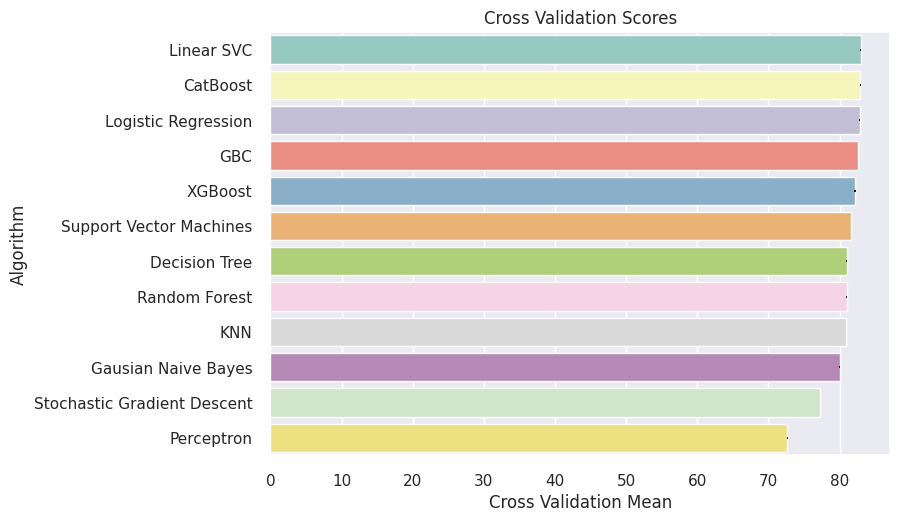

In [ ]:
sns.barplot(x='Cross Validation Mean', y='Algorithm', data=cv_res,
            order=cv_res.sort_values(by='Cross Validation Mean', ascending=False)['Algorithm'],
            palette='Set3', **{'xerr': cv_std})

plt.ylabel('Algorithm')
plt.title('Cross Validation Scores')

# Display the plot
plt.show()

 Linear SVC shows promising performance .

###Conclusion and predicting

Considering the higher cross-validation mean score and a reasonably good train-test split accuracy score, Linear SVC() appears to be a suitable choice for classification task on the Titanic dataset.

Hyperparameter tuning for Linear_SVC()

In [ ]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'loss': ['hinge', 'squared_hinge']
}

linear_svc = LinearSVC(max_iter=1000)

grid_search = GridSearchCV(linear_svc, param_grid, scoring='accuracy', cv=5)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_model = LinearSVC(**best_params)

best_model.fit(X_train, Y_train)

accuracy = round(best_model.score(X_test, Y_test)*100,2)


In [ ]:
print("Best Parameters:", best_params)
print("Test Accuracy:", accuracy)

Best Parameters: {'C': 0.1, 'loss': 'squared_hinge', 'penalty': 'l2'}
Test Accuracy: 83.51


In [ ]:
cvs=round(cross_val_score(best_model, x_train, y_train, scoring = 'accuracy', cv = 10).mean()*100,2)

In [ ]:
cvs

83.16


Our mean cross validation score improved.

In [ ]:
# Survival predictions

Y_pred=best_model.predict(x_test)

In [ ]:
Y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
len(Y_pred)

418

##Data for submission and testing

In [ ]:
# Create submission dataframe
from sklearn.metrics import accuracy_score
test['Survived']=Y_pred

In [ ]:
test = test.reset_index(drop=True)
test_v = test_v.reset_index(drop=True)
test['PassengerId'] = test_v['PassengerId']

In [ ]:
gs=pd.read_csv('gender_submission.csv')
gs.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
print(gs.shape)
print(test.shape)

(418, 2)
(418, 20)


In [ ]:
submit = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': Y_pred})
submit.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [ ]:
accuracy_score(submit['Survived'],gs['Survived'])

0.9066985645933014

In [ ]:
submit.to_csv("Final_titanic.csv", index = False)

My kaggle public score :0.76